In [1]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt
import numpy as np

In [2]:
mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

maxcapacityfor_spp = 90
maxcapacityfor_vspp = 10

radius_spp_wind = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_wind * 3.14)) / 100,5)
radius_vspp_wind = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_wind * 3.14)) / 100,5)

radius_spp_solar = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_solar * 3.14)) / 100,5)
radius_vspp_solar = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_solar * 3.14)) / 100,5)

suitablearea_biomass = 150 ## km2
suitablearea_bgec = 150 ## km2
suitablearea_msw = 150 ## km2

print('radius_spp_wind km = ',radius_spp_wind*100,' buffer = ',radius_spp_wind)
print('radius_vspp_wind km = ',radius_vspp_wind*100,' buffer = ',radius_vspp_wind)
print('radius_spp_solar km = ',radius_spp_solar*100,' buffer = ',radius_spp_solar)
print('radius_vspp_solar km = ',radius_vspp_solar*100,' buffer = ',radius_vspp_solar)

radius_spp_wind km =  2.524  buffer =  0.02524
radius_vspp_wind km =  0.8410000000000001  buffer =  0.00841
radius_spp_solar km =  1.3820000000000001  buffer =  0.01382
radius_vspp_solar km =  0.461  buffer =  0.00461


In [3]:
scenario_SI = 0

xr_out = xr.open_dataset('Output\\xr_output_all_scenario_SI_' + str(scenario_SI) + '_.nc')
print(xr_out)
print("cap_wind = ",xr_out['cap_wind'].sum())
print("cap_solar = ",xr_out['cap_solar'].sum())
print("cap_biomass = ",xr_out['cap_biomass'].sum())
print("cap_bgec = ",xr_out['cap_bgec'].sum())
print("cap_msw = ",xr_out['cap_msw'].sum())

<xarray.Dataset>
Dimensions:      (lat: 267, lon: 149)
Coordinates:
  * lat          (lat) float64 5.642 5.697 5.753 5.808 ... 20.31 20.36 20.42
  * lon          (lon) float64 97.37 97.43 97.48 97.54 ... 105.5 105.5 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) int64 ...
    SI_BGEC      (lat, lon) float64 ...
    SI_Biomass   (lat, lon) float64 ...
    SI_Solar     (lat, lon) float64 ...
    SI_Wind      (lat, lon) float64 ...
    SI_MSW       (lat, lon) float64 ...
    ...           ...
    region       (lat, lon) object ...
    cap_wind     (lat, lon) float64 ...
    cap_solar    (lat, lon) float64 ...
    cap_biomass  (lat, lon) float64 ...
    cap_bgec     (lat, lon) float64 ...
    cap_msw      (lat, lon) float64 ...
cap_wind =  <xarray.DataArray 'cap_wind' ()>
array(25.515)
cap_solar =  <xarray.DataArray 'cap_solar' ()>
array(220914.65)
cap_biomass =  <xarray.DataArray 'cap_biomass' ()>
array(10692.105)
cap_bgec =  <xarray.DataArray 'cap_bgec' ()>
array(0.)
cap_msw =

In [4]:
df_wind = xr_out.to_dataframe()
xr_out.close()
df_wind.reset_index(inplace=True)
df_wind = gpd.GeoDataFrame(df_wind, geometry =gpd.points_from_xy(df_wind['lon'],df_wind['lat']))
df_wind.crs = {'init': 'epsg:4326'}
print(len(df_wind))
for i,c in enumerate(df_wind.columns):
    if c not in (['lon','lat','SI_Wind','SI_Wind_max','SI_Wind_min','region','ADM1_EN','cap_wind','AVA_Wind','geometry']):
        df_wind = df_wind.drop(columns=c)

df_wind = df_wind.loc[df_wind['cap_wind'] > 0]
df_wind.reset_index(inplace=True,drop=False)
df_wind.crs = {'init': 'epsg:4326'}
df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)
df_wind = df_wind.set_geometry('buffer')

df_wind.to_csv('Output\\Output_wind_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_wind)

39783


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


   index        lat         lon   SI_Wind  AVA_Wind     ADM1_EN region  \
0  13594  10.697222   99.316667  0.038001      0.81    Chumphon     R3   
1  14187  10.919444   99.150000  0.062235      1.62    Chumphon     R3   
2  24949  14.919444  101.038889  0.066366      1.53    Lop Buri     R1   
3  30166  16.863889  101.150000  0.049594      1.71  Phetchabun     R4   

   cap_wind                    geometry  \
0     3.645   POINT (99.31667 10.69722)   
1     7.290   POINT (99.15000 10.91944)   
2     6.885  POINT (101.03889 14.91944)   
3     7.695  POINT (101.15000 16.86389)   

                                              buffer  
0  POLYGON ((99.32175 10.70230, 99.32175 10.69214...  
1  POLYGON ((99.15718 10.92662, 99.15718 10.91226...  
2  POLYGON ((101.04587 14.92642, 101.04587 14.912...  
3  POLYGON ((101.15738 16.87127, 101.15738 16.856...  


C:\Users\EGAT\AppData\Local\Temp\ipykernel_34380\31956592.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)


In [5]:
df_solar = xr_out.to_dataframe()
df_solar.reset_index(inplace=True)
df_solar = gpd.GeoDataFrame(df_solar, geometry =gpd.points_from_xy(df_solar['lon'],df_solar['lat']))
df_solar.crs = {'init': 'epsg:4326'}
print(len(df_solar))
for i,c in enumerate(df_solar.columns):
    if c not in (['lon','lat','SI_Solar','SI_Solar_max','SI_Solar_min','region','ADM1_EN','cap_solar','AVA_Solar','geometry']):
        df_solar = df_solar.drop(columns=c)

df_solar = df_solar.loc[df_solar['cap_solar'] > 0]
df_solar.reset_index(inplace=True,drop=False)
df_solar.crs = {'init': 'epsg:4326'}
df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)
df_solar = df_solar.set_geometry('buffer')

df_solar.to_csv('Output\\Output_solar_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_solar)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


39783


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_34380\1997959653.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)


      index        lat         lon  SI_Solar  AVA_Solar     ADM1_EN region  \
0       977   5.975000  101.983333  0.036150   0.540000  Narathiwat     R3   
1      1276   6.086111  102.038889  0.117775   1.890000  Narathiwat     R3   
2      1425   6.141667  102.038889  0.036804   0.540000  Narathiwat     R3   
3      1426   6.141667  102.094444  0.042867   0.630000  Narathiwat     R3   
4      1576   6.197222  102.150000  0.005351   0.090000  Narathiwat     R3   
...     ...        ...         ...       ...        ...         ...    ...   
1835  38026  19.808333   99.094444  0.046431   0.990000  Chiang Rai     R4   
1836  38946  20.141667  100.538889  0.059949   1.080000  Chiang Rai     R4   
1837  39381  20.308333   99.872222  0.444567   7.470000  Chiang Rai     R4   
1838  39382  20.308333   99.927778  0.747419  12.509999  Chiang Rai     R4   
1839  39531  20.363889   99.927778  0.079379   1.350000  Chiang Rai     R4   

      cap_solar                    geometry  \
0          8.10 

In [6]:
df_biomass = xr_out.to_dataframe()
df_biomass.reset_index(inplace=True)
df_biomass = gpd.GeoDataFrame(df_biomass, geometry =gpd.points_from_xy(df_biomass['lon'],df_biomass['lat']))
df_biomass.crs = {'init': 'epsg:4326'}
print(len(df_biomass))
for i,c in enumerate(df_biomass.columns):
    if c not in (['lon','lat','SI_Biomass','SI_Biomass_max','SI_Biomass_min','region','ADM1_EN','cap_biomass','geometry']):
        df_biomass = df_biomass.drop(columns=c)

df_biomass = df_biomass.loc[df_biomass['cap_biomass'] > 0]
df_biomass.reset_index(inplace=True,drop=False)
df_biomass.crs = {'init': 'epsg:4326'}
df_biomass['buffer'] = df_biomass['geometry'].buffer(np.round(np.sqrt(suitablearea_biomass/(3.14)) / 150,5),cap_style = 3)
df_biomass = df_biomass.set_geometry('buffer')

df_biomass.to_csv('Output\\Output_biomass_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_biomass)

39783
      index        lat         lon  SI_Biomass     ADM1_EN region  \
0       366   5.752778  101.150000    0.323103        Yala     R3   
1       674   5.863889  101.705556    0.350285  Narathiwat     R3   
2       813   5.919444  101.150000    0.278139        Yala     R3   
3       826   5.919444  101.872222    0.389308  Narathiwat     R3   
4      1118   6.030556  101.538889    0.066878  Narathiwat     R3   
...     ...        ...         ...         ...         ...    ...   
1131  39087  20.197222  100.094444    1.738740  Chiang Rai     R4   
1132  39090  20.197222  100.261111    1.962140  Chiang Rai     R4   
1133  39093  20.197222  100.427778    0.191662  Chiang Rai     R4   
1134  39533  20.363889  100.038889    0.595336  Chiang Rai     R4   
1135  39536  20.363889  100.205556    0.666056  Chiang Rai     R4   

      cap_biomass                    geometry  \
0           1.000   POINT (101.15000 5.75278)   
1           1.000   POINT (101.70556 5.86389)   
2           2.453 

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_34380\2327727840.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use '

In [7]:
df_bgec = xr_out.to_dataframe()
df_bgec.reset_index(inplace=True)
df_bgec = gpd.GeoDataFrame(df_bgec, geometry =gpd.points_from_xy(df_bgec['lon'],df_bgec['lat']))
df_bgec.crs = {'init': 'epsg:4326'}
print(len(df_bgec))
for i,c in enumerate(df_bgec.columns):
    if c not in (['lon','lat','SI_BGEC','SI_BGEC_max','SI_BGEC_min','region','ADM1_EN','cap_bgec','geometry']):
        df_bgec = df_bgec.drop(columns=c)

df_bgec = df_bgec.loc[df_bgec['cap_bgec'] > 0]
df_bgec.reset_index(inplace=True,drop=False)
df_bgec.crs = {'init': 'epsg:4326'}
df_bgec['buffer'] = df_bgec['geometry'].buffer(np.round(np.sqrt(suitablearea_bgec/(3.14)) / 150,5),cap_style = 3)
df_bgec = df_bgec.set_geometry('buffer')

df_bgec.to_csv('Output\\Output_bgec_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_bgec)

39783
Empty GeoDataFrame
Columns: [index, lat, lon, SI_BGEC, ADM1_EN, region, cap_bgec, geometry, buffer]
Index: []


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_34380\893800580.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'G

In [8]:
df_msw = xr_out.to_dataframe()
df_msw.reset_index(inplace=True)
df_msw = gpd.GeoDataFrame(df_msw, geometry =gpd.points_from_xy(df_msw['lon'],df_msw['lat']))
df_msw.crs = {'init': 'epsg:4326'}
print(len(df_msw))
for i,c in enumerate(df_msw.columns):
    if c not in (['lon','lat','SI_MSW','SI_MSW_max','SI_MSW_min','region','ADM1_EN','cap_msw','geometry']):
        df_msw = df_msw.drop(columns=c)

df_msw = df_msw.loc[df_msw['cap_msw'] > 0]
df_msw.reset_index(inplace=True,drop=False)
df_msw.crs = {'init': 'epsg:4326'}
df_msw['buffer'] = df_msw['geometry'].buffer(np.round(np.sqrt(suitablearea_msw/(3.14)) / 150,5),cap_style = 3)
df_msw = df_msw.set_geometry('buffer')

df_msw.to_csv('Output\\Output_msw_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_msw)

39783
    index        lat         lon    SI_MSW              ADM1_EN region  \
0    2732   6.641667  100.150000  0.060049                Satun     R3   
1    5977   7.863889   98.316667  0.037599               Phuket     R3   
2    6425   8.030556   98.372222  0.009674               Phuket     R3   
3   10151   9.419444   98.427778  0.163084               Ranong     R3   
4   11346   9.863889   98.594444  0.169134               Ranong     R3   
5   16728  11.863889   99.594444  0.273446  Prachuap Khiri Khan     R1   
6   18707  12.586111  101.927778  0.173714          Chanthaburi     R1   
7   18710  12.586111  102.094444  0.177604          Chanthaburi     R1   
8   18838  12.641667  100.927778  0.014661               Rayong     R1   
9   20757  13.363889   99.927778  0.031134      Samut Songkhram     R1   
10  21208  13.530556  100.150000  0.270304         Samut Sakhon     R1   
11  21211  13.530556  100.316667  0.007515         Samut Sakhon     R1   
12  21218  13.530556  100.705556

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_34380\1325974872.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use '

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  25.515
R0 wind =  0.0
R1 wind =  6.885
R2 wind =  0.0
R3 wind =  10.935
R4 wind =  7.695


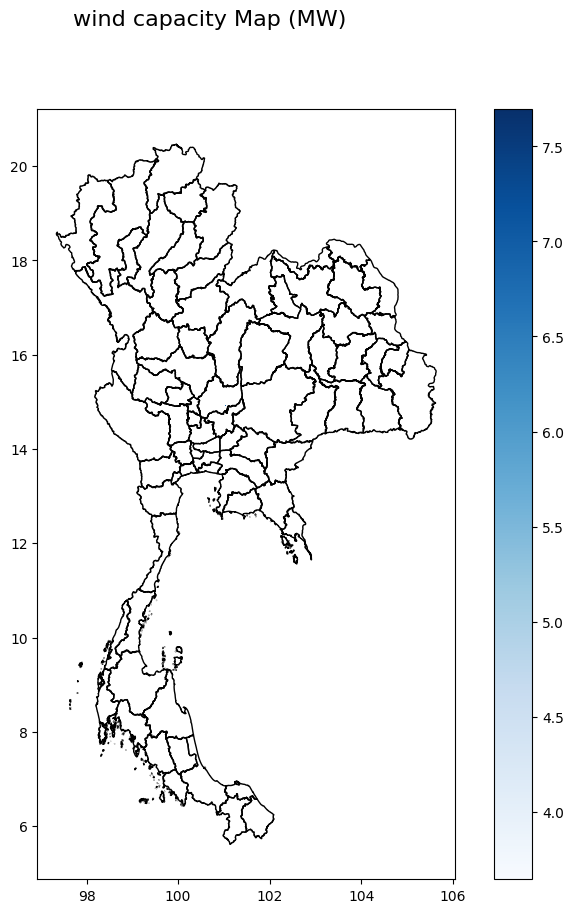

In [9]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

print("total wind capacity = ", df_wind['cap_wind'].sum())
print("R0 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R0'].sum())
print("R1 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R1'].sum())
print("R2 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R2'].sum())
print("R3 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R3'].sum())
print("R4 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('wind capacity Map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_wind.plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None

total solar capacity =  220914.65000000002
R0 Solar =  1651.0
R1 Solar =  37731.700000000004
R2 Solar =  136251.9
R3 Solar =  2136.3
R4 Solar =  43143.75


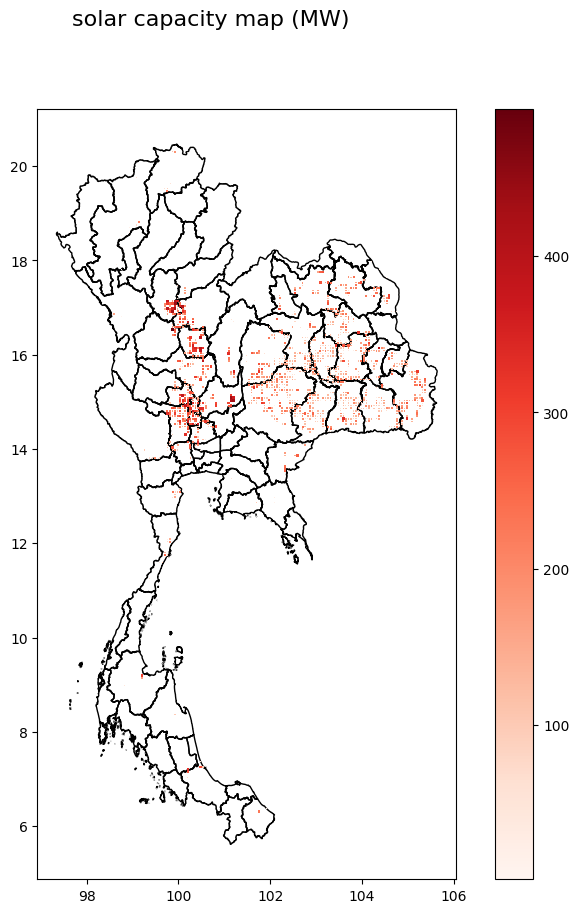

In [10]:
print("total solar capacity = ", df_solar['cap_solar'].sum())
print("R0 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R0'].sum())
print("R1 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R1'].sum())
print("R2 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R2'].sum())
print("R3 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R3'].sum())
print("R4 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('solar capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_solar.plot(ax = ax,legend=True,zorder = 1,column = 'cap_solar',cmap = 'Reds')
except:
    None


total biomass capacity =  10692.105
R0 biomass =  38.503
R1 biomass =  2140.785
R2 biomass =  3232.1409999999996
R3 biomass =  2321.303
R4 biomass =  2959.3729999999996


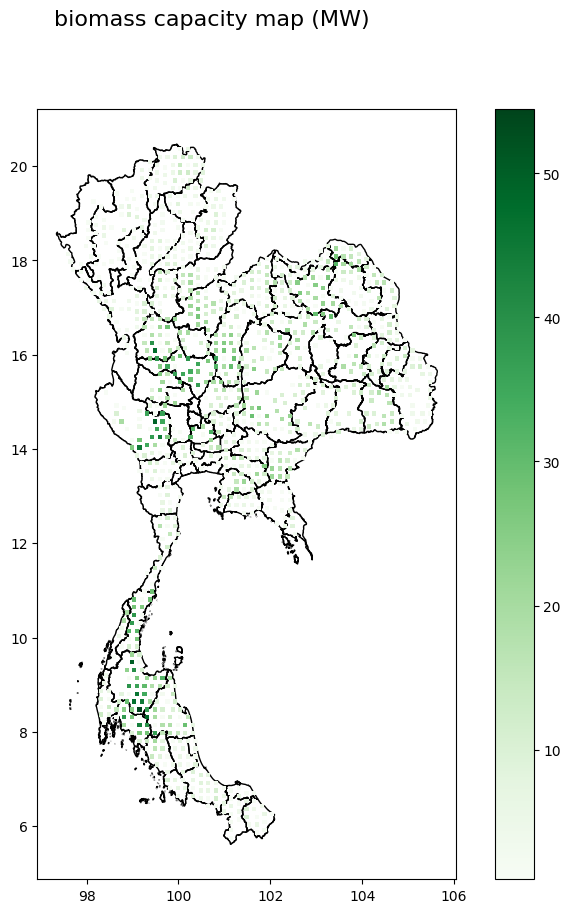

In [11]:
print("total biomass capacity = ", df_biomass['cap_biomass'].sum())
print("R0 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R0'].sum())
print("R1 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R1'].sum())
print("R2 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R2'].sum())
print("R3 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R3'].sum())
print("R4 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('biomass capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_biomass.plot(ax = ax,legend=True,zorder = 1,column = 'cap_biomass',cmap = 'Greens')
except:
    None

total bgec capacity =  0.0
R0 bgec =  0.0
R1 bgec =  0.0
R2 bgec =  0.0
R3 bgec =  0.0
R4 bgec =  0.0


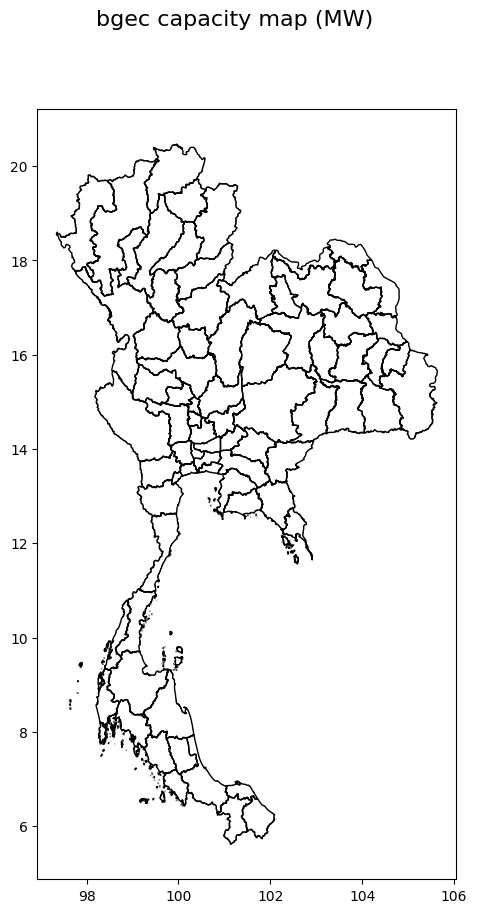

In [12]:
print("total bgec capacity = ", df_bgec['cap_bgec'].sum())
print("R0 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R0'].sum())
print("R1 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R1'].sum())
print("R2 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R2'].sum())
print("R3 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R3'].sum())
print("R4 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('bgec capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_bgec.plot(ax = ax,legend=True,zorder = 1,column = 'cap_bgec',cmap = 'Purples')
except:
    None

total msw capacity =  204.779
R0 msw =  93.047
R1 msw =  61.19299999999999
R2 msw =  2.129
R3 msw =  16.575
R4 msw =  31.835


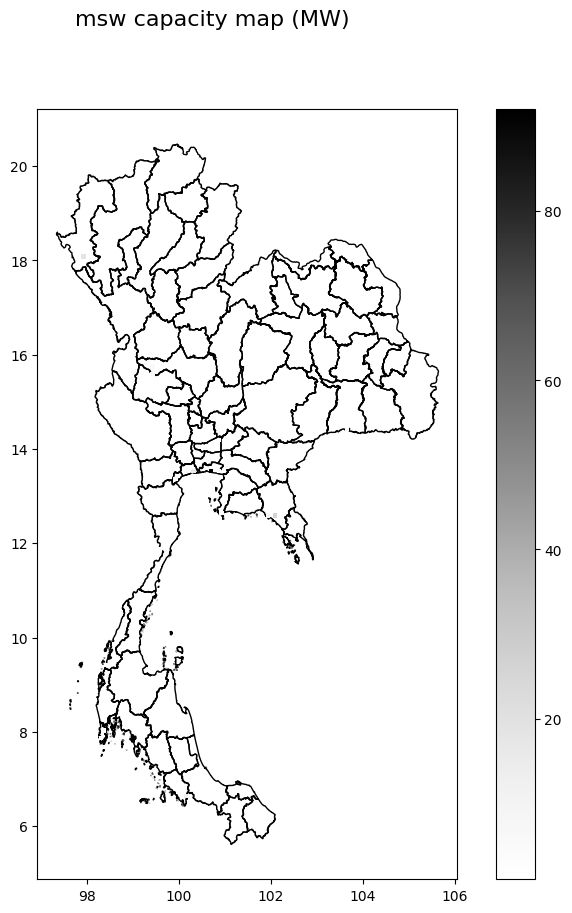

In [13]:
print("total msw capacity = ", df_msw['cap_msw'].sum())
print("R0 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R0'].sum())
print("R1 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R1'].sum())
print("R2 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R2'].sum())
print("R3 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R3'].sum())
print("R4 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('msw capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_msw.plot(ax = ax,legend=True,zorder = 1,column = 'cap_msw',cmap = 'Greys')
except:
    None

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  0.0
total solar capacity =  8431.199999999999
total biomass capacity =  200.049
total bgec capacity =  0.0
total msw capacity =  0.0


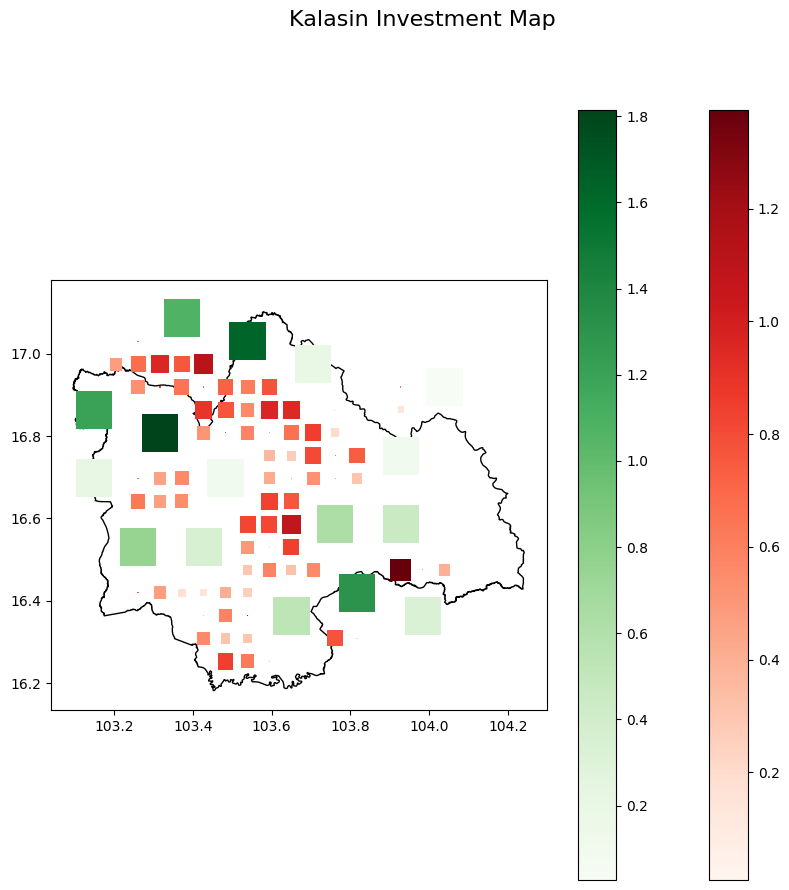

In [14]:
province = 'Kalasin'
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
specificarea = thailandmap.loc[thailandmap['ADM1_EN'] == province]
bound = specificarea.unary_union.bounds

print("total wind capacity = ", df_wind['cap_wind'].loc[df_wind['ADM1_EN'] == province].sum())

print("total solar capacity = ", df_solar['cap_solar'].loc[df_solar['ADM1_EN'] == province].sum())

print("total biomass capacity = ", df_biomass['cap_biomass'].loc[df_biomass['ADM1_EN'] == province].sum())

print("total bgec capacity = ", df_bgec['cap_bgec'].loc[df_bgec['ADM1_EN'] == province].sum())

print("total msw capacity = ", df_msw['cap_msw'].loc[df_msw['ADM1_EN'] == province].sum())


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(province + ' Investment Map ', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 1,column = 'SI_Wind',cmap = 'Blues')
except:
    None
try:
    df_solar.loc[df_solar['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'SI_Solar',cmap = 'Reds')
except:
    None
try:
    df_biomass.loc[df_biomass['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'SI_Biomass',cmap = 'Greens')
except:
    None
try:
    df_bgec.loc[df_bgec['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'SI_BGEC',cmap = 'Purples')
except:
    None
try:
    df_msw.loc[df_msw['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'SI_MSW',cmap = 'Greys')
except:
    None



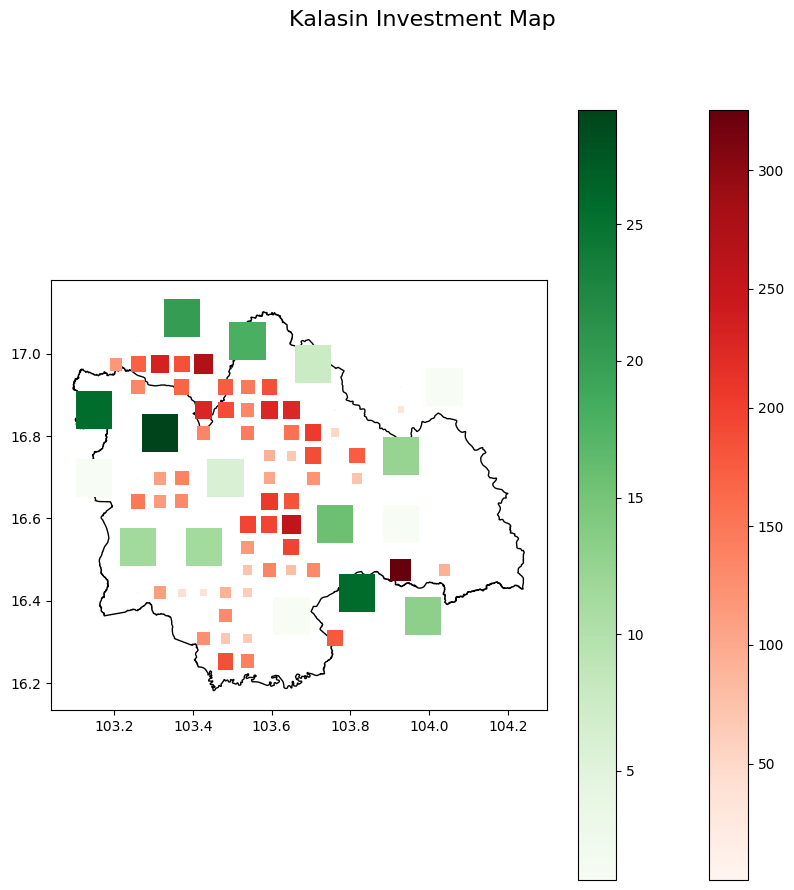

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(province + ' Investment Map ', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None
try:
    df_solar.loc[df_solar['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'cap_solar',cmap = 'Reds')
except:
    None
try:
    df_biomass.loc[df_biomass['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'cap_biomass',cmap = 'Greens')
except:
    None
try:
    df_bgec.loc[df_bgec['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'cap_bgec',cmap = 'Purples')
except:
    None
try:
    df_msw.loc[df_msw['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'cap_msw',cmap = 'Greys')
except:
    None
